In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r'loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df=df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df[(df['Credit_History'] ==1.0) & (df['Loan_Status'] == 'Y')]['Loan_ID'].count()


325

In [7]:
df[df['Loan_Status']=='Y']['Loan_ID'].count()

332

In [8]:
df[(df['Credit_History'] ==0.0) & (df['Loan_Status'] == 'Y')]['Loan_ID'].count()
## There are individual if cases where loan was approved even though the credit history was 0.0

7

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])

df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])



C:\Users\Saurabh\AppData\Local\Temp/ipykernel_6316/3372733010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=le.fit_transform(df['Gender'])
C:\Users\Saurabh\AppData\Local\Temp/ipykernel_6316/3372733010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=le.fit_transform(df['Married'])
C:\Users\Saurabh\AppData\Local\Temp/ipykernel_6316/3372733010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


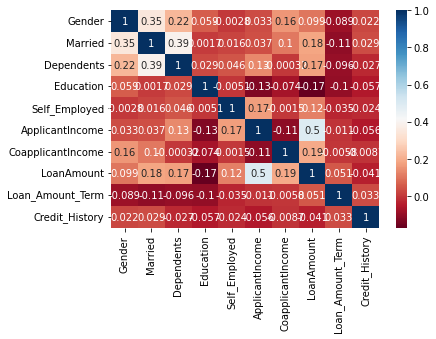

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [14]:
X=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
     ,'Loan_Amount_Term','Credit_History']].values
     
y=df[['Loan_Status']].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [18]:
model.fit(X_train,y_train)

C:\Users\Saurabh\anaconda3\envs\py38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_pred,y_test)

0.75

Resgression

Same Data

Target Variable : LoanAmount


In [22]:
df2=df
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int32  
 2   Married            480 non-null    int32  
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    int32  
 5   Self_Employed      480 non-null    int32  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int32(5), int64(1), object(3)
memory usage: 43.1+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
df2['Loan_Status']=le.fit_transform(df2['Loan_Status'])
df2

C:\Users\Saurabh\AppData\Local\Temp/ipykernel_6316/1681758887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Loan_Status']=le.fit_transform(df2['Loan_Status'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [48]:
X2=df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Status'
      ,'Loan_Amount_Term','Credit_History']].values
     
y2=df[['LoanAmount']].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=1)

In [51]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [52]:
model2.fit(X2_train,y2_train)


LinearRegression()

In [53]:
loan_amt_preds=model2.predict(X2_test)

In [54]:
from sklearn.metrics import mean_squared_error


In [55]:
mse=mean_squared_error(y2_test,loan_amt_preds)
mse

4486.1271379005075

In [56]:
import math
rmse=math.sqrt(mse)
rmse

66.97855729933653



Predict if loan will be approved for a particular person and if approved,how much????




---------------------------------------------------------------------------------------
1. Predicting if Loan will be approved to a person or not.

In [62]:
print("Enter your loan details:")
gender=input("Gender:(1 for male,0 for female): ")
married=input("Married:(1 if no,0 if yes): ")
dep=input("Number of dependents:(if > 3,just enter 3): ")
edu=input("Education:(Enter 0 if graduate,1 if you are not a graduate): ")
self=input("Are you self-employed?1 for yes,0 for no: ")
income1=input("Enter your income: ")
income2=input("Enter your co-applicant's income: ")
loan=input("Loan amt:")                  #how much loan do you want??
n=input("Enter loan amt term: ")
chist=input("Credit history: ")


Enter your loan details:
Gender:(1 for male,0 for female): 1
Married:(1 if no,0 if yes): 1
Number of dependents:(if > 3,just enter 3): 2
Education:(Enter 0 if graduate,1 if you are not a graduate): 0
Are you self-employed?1 for yes,0 for no: 0
Enter your income: 3500
Enter your co-applicant's income: 2000
Loan amt:400
Enter loan amt term: 100
Credit history: 1.0


In [63]:
question=pd.DataFrame({'gender':[gender],'married':[married],'dependents':[dep],'education':[edu],
                      'self':[self],'income1':[income1],'income2':[income2],'loan':[loan],
                       'term':[n],'Credit_History':[chist]
                      })

In [64]:
question

,gender,married,dependents,education,self,income1,income2,loan,term,Credit_History
0,1,1,2,0,0,3500,2000,400,100,1.0


In [65]:
def computeLoanAmt():
    question2=pd.DataFrame({'gender':[gender],'married':[married],'dependents':[dep],'education':[edu],
                      'self':[self],'income1':[income1],'income2':[income2],'Loan_status':[status],
                       'term':[n],'Credit_History':[chist]
                      })
    loan_amt=model2.predict(question2)[0][0]   #predict how much loan will be approved using regression model
    
    print("Congratulations!Your loan has been approved!!!!")
    
    print("Loan Amount applied= ",loan)
    print("Loan Amount approved= ",'%.2f' %loan_amt)

In [66]:
loan_status=model.predict(question)  #predict if loan will be approved or not using Classification model


if(loan_status[0] == 'Y'):
    computeLoanAmt()
    
else:
    print("Sorry,your loan has been rejected.Better luck next time...")
    status=0

Congratulations!Your loan has been approved!!!!
Loan Amount applied=  400
Loan Amount approved=  139.25


C:\Users\Saurabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Saurabh\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
